In [1]:
setwd(paste0(Sys.getenv('R_SOURCES'), '/house_prices'))
getwd()

[1] "/mnt/hdd/develop/kaggle/R_sources/house_prices"

In [3]:
source('main.R')
house_prices$helpers$import_libs()

combined_dataset <-
    house_prices$helpers$load_data() %>%
    (house_prices$outliers$remove_outliers) %>%
    (house_prices$missing$categ$replace_with_most_common) %>%
    (house_prices$missing$categ$fix_valid) %>%
    (house_prices$missing$numeric$replace_with_zero) %>%
    select(-Id)

training_dataset <- 
    combined_dataset %>% 
    filter(dataSource == 'train')


test_that("should be no NA values except SalePrice column", {
    expect_equal(sum(is.na(combined_dataset %>% select(-SalePrice))), 0)
})


test_that("should be no NA values in training_dataset", {
    expect_equal(sum(is.na(training_dataset)), 0)
})

var,predictor,score
BsmtUnfSF,sqrt,79.97603
GrLivArea,log,91.15794
LotArea,log,73.38993
SalePrice,log,91.29809
TotRmsAbvGrd,log,30.68502
X1stFlrSF,log,90.77166


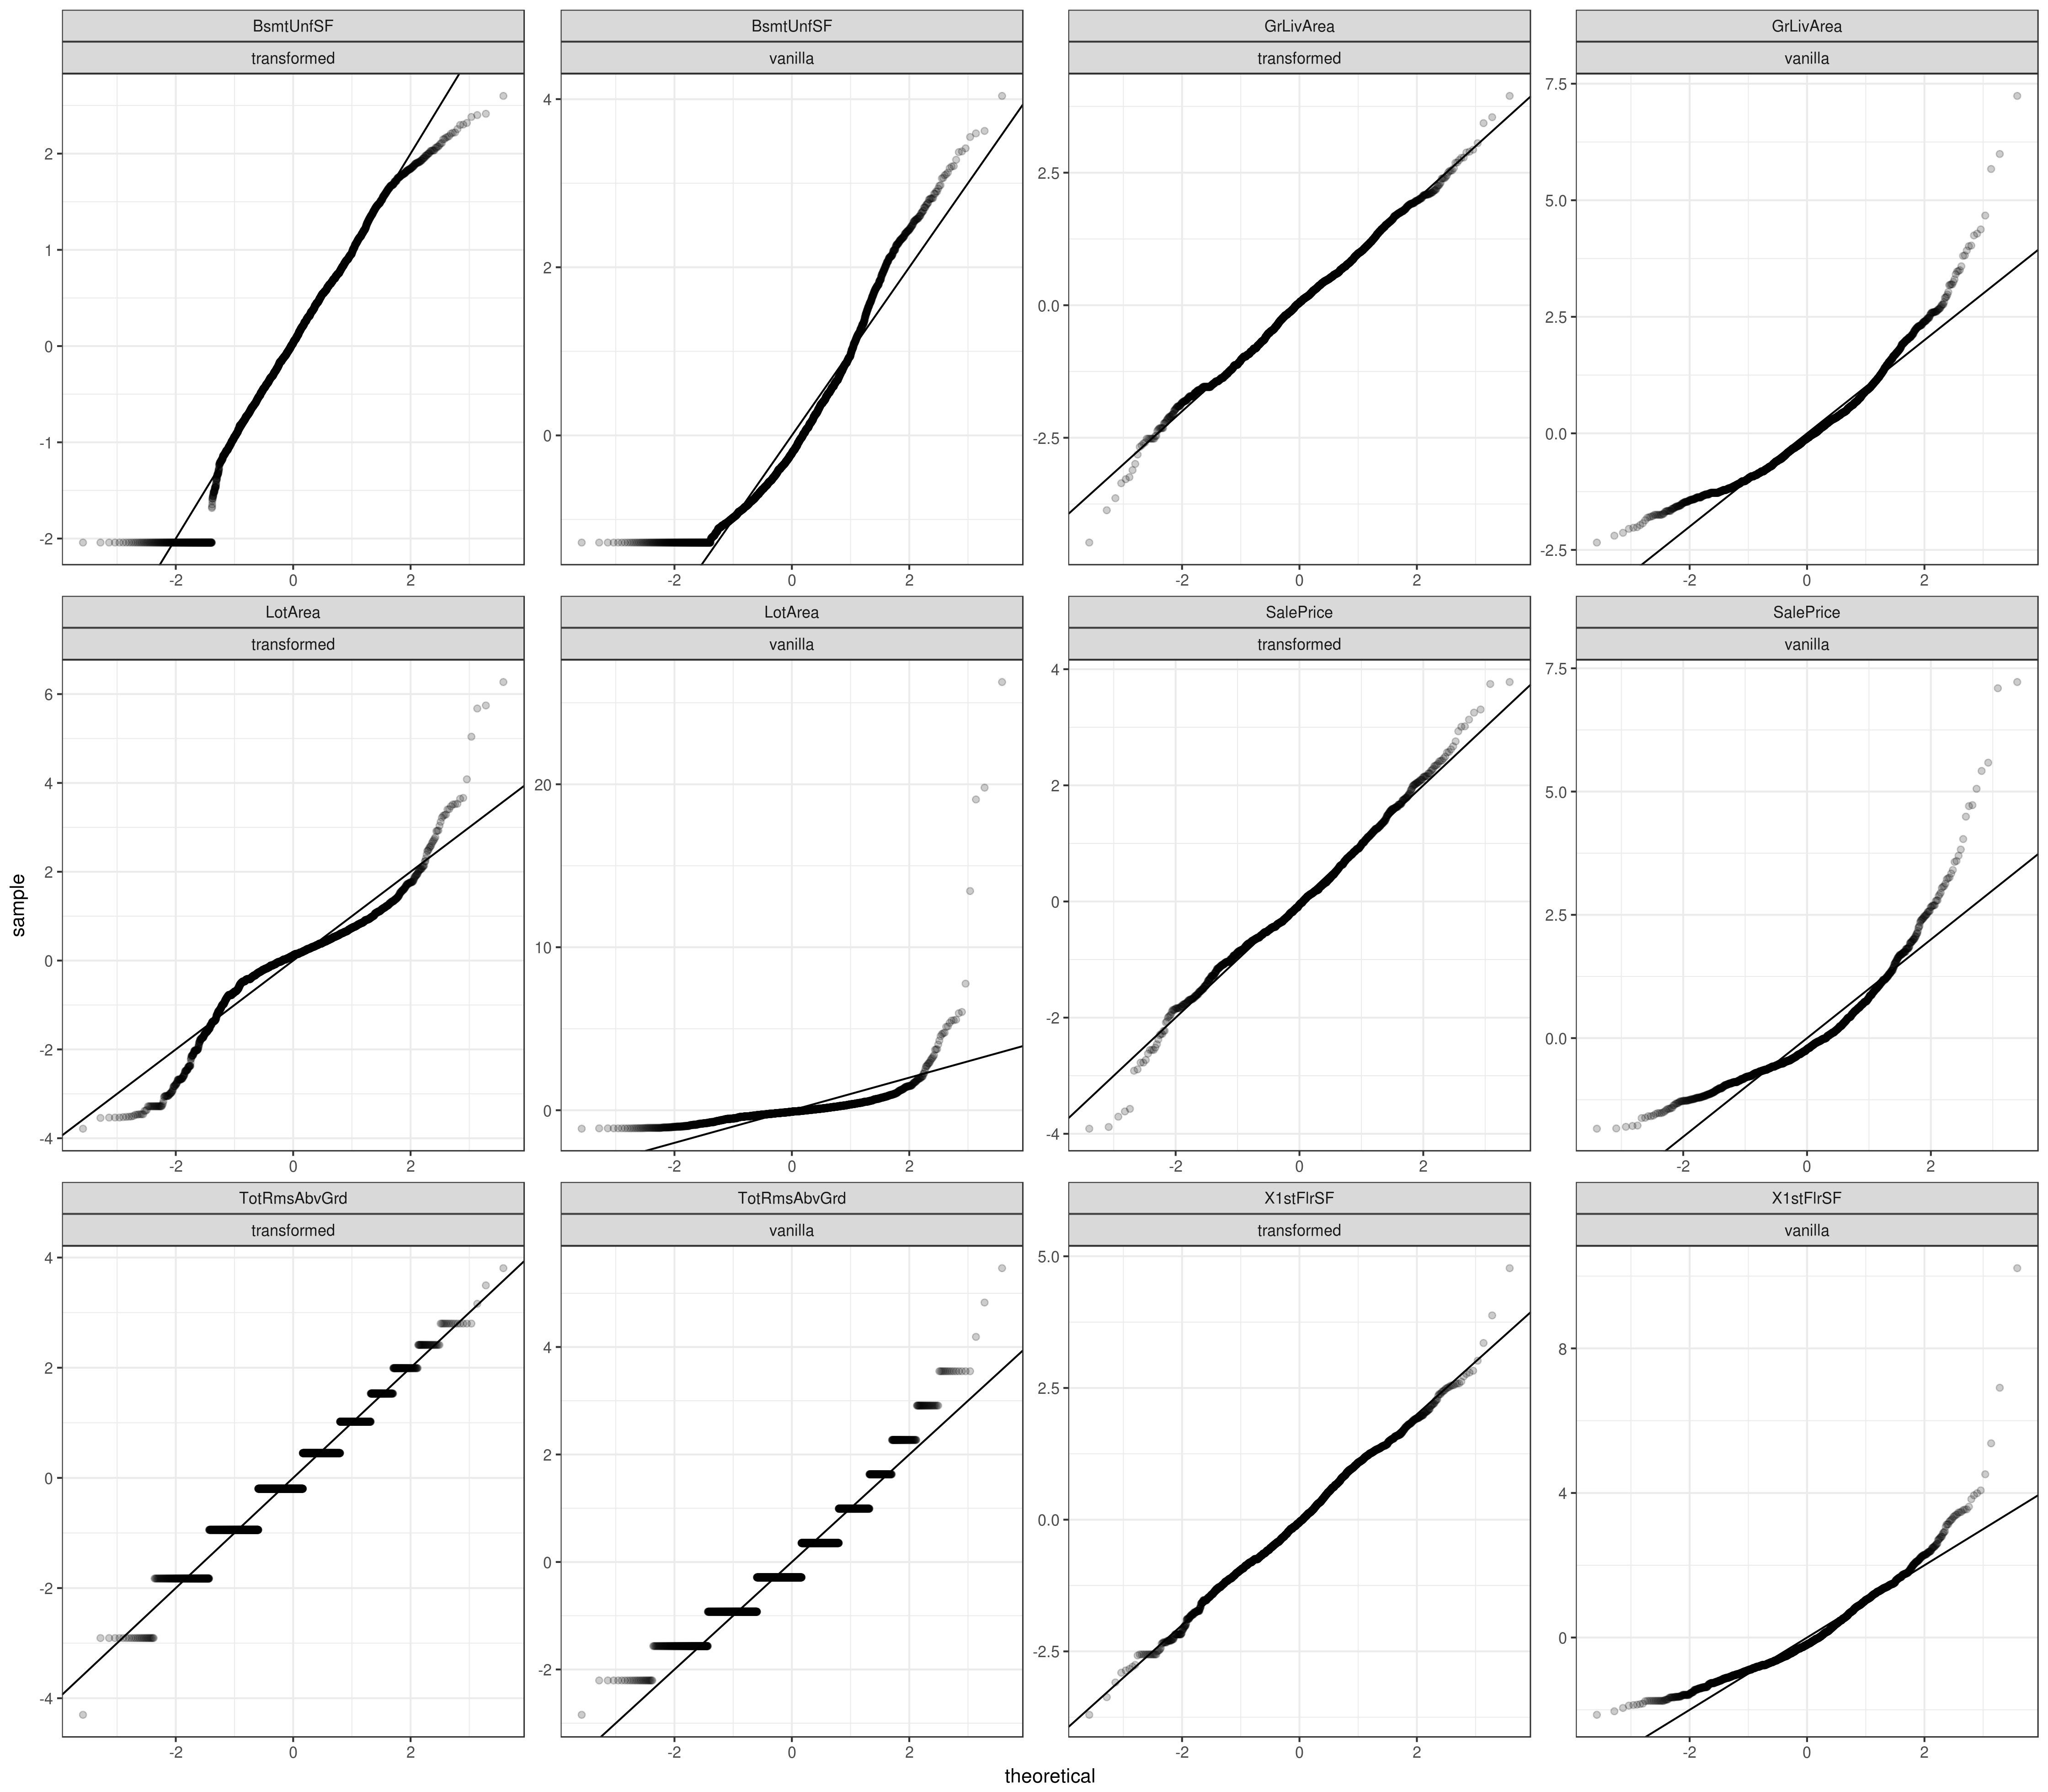

In [5]:
options(repr.plot.width = 16, repr.plot.height = 14, repr.plot.res=280)

transformation_config <- house_prices$trans$numeric$get_transformation_config(combined_dataset)
transformation_config

house_prices$trans$numeric$for_qq_plot(combined_dataset, transformation_config) %>%
ggplot() +
geom_qq(aes(sample=normed_value), alpha=0.2) +
facet_wrap(var~tran, ncol=4, scales="free") +
geom_abline(slope=1) +
theme_bw()

In [34]:
source('main.R')

combined_dataset_transformed <-
    house_prices$trans$numeric$apply_transform(combined_dataset)


test_that("should be equal", {
    expect_equal(
        combined_dataset_transformed %>% select(-one_of(transformation_config$var)), 
        combined_dataset %>% select(-one_of(transformation_config$var))
    )
})

# A tibble: 6 x 3
           var predictor    score
         <chr>     <chr>    <dbl>
1    BsmtUnfSF      sqrt 79.97603
2    GrLivArea       log 91.15794
3      LotArea       log 73.38993
4    SalePrice       log 91.29809
5 TotRmsAbvGrd       log 30.68502
6    X1stFlrSF       log 90.77166
